# Assignment 3
### Due 9/21. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
nhanes = pd.read_csv('data/nhanes_data_17_18.csv')


C:\Users\josep\AppData\Local\Temp\ipykernel_18848\1464002295.py:5: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhanes = pd.read_csv('data/nhanes_data_17_18.csv')


SEQN                                1
GeneralHealthCondition              1
EverBreastfedOrFedBreastmilk        1
AgeStoppedBreastfeedingdays         1
AgeFirstFedFormuladays              1
                                   ..
CurrentSelfreportedWeightPounds     1
TriedToLoseWeightInPastYear         1
TimesLost10LbsOrMoreToLoseWeight    1
Hearing_na                          1
Concentration_na                    1
Name: count, Length: 200, dtype: int64

In [101]:
nhanes['Hearing_na'] = nhanes['HaveSeriousDifficultyHearing'].isna()
nhanes['Concentration_na'] = nhanes['HaveSeriousDifficultyConcentrating'].isna()
nhanes['Hearing_na'].value_counts(), nhanes['Concentration_na'].value_counts()

(Hearing_na
 False    8365
 True        1
 Name: count, dtype: int64,
 Concentration_na
 False    7595
 True      771
 Name: count, dtype: int64)

In [104]:
pd.crosstab(nhanes['HaveSeriousDifficultyHearing'], nhanes['Concentration_na'], normalize='index')

Concentration_na,False,True
HaveSeriousDifficultyHearing,,
0.0,0.902041,0.097959
1.0,0.994286,0.005714


Looking at the number of N/A values between the two variables I am looking at, it doesn't appear that they will play a huge roll in the analysis. There are not many N/A values so although we see drastically different rates of N/A values across the two variables

In [ ]:
pd.crosstab(nhanes['HaveSeriousDifficultyHearing'], nhanes['HaveSeriousDifficultyConcentrating'])

HaveSeriousDifficultyConcentrating,0.0,1.0
HaveSeriousDifficultyHearing,,
0.0,6337,735
1.0,361,161


In [97]:
pd.crosstab(nhanes['HaveSeriousDifficultyHearing'], nhanes['HaveSeriousDifficultyConcentrating'], normalize='index')

HaveSeriousDifficultyConcentrating,0.0,1.0
HaveSeriousDifficultyHearing,,
0.0,0.896069,0.103931
1.0,0.691571,0.308429


When seeing the normalized contingency table, it is pretty evident that people who reported having difficulty hearing have a much higher likelihood of reporting that they have difficulty concentrating. While we can see the sample size is much lower for people who do report hearing difficulties, the proportion of concentration issues is almost triple that for people who do not have hearing issues. 

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [99]:
nhanes['TotalPercentFat'].groupby(nhanes['TriedMyPlatePlan']).mean()

TriedMyPlatePlan
0.0    32.489861
1.0    35.310656
Name: TotalPercentFat, dtype: float64

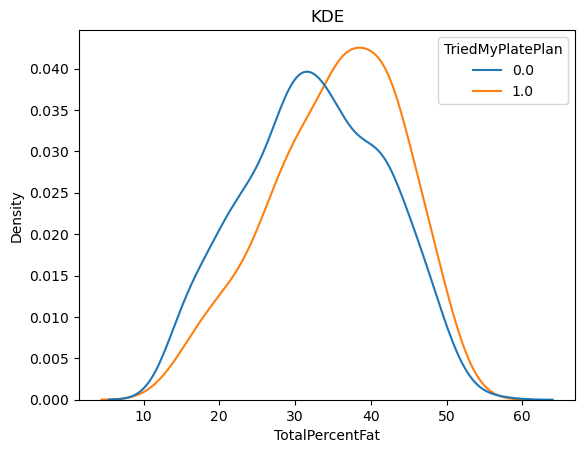

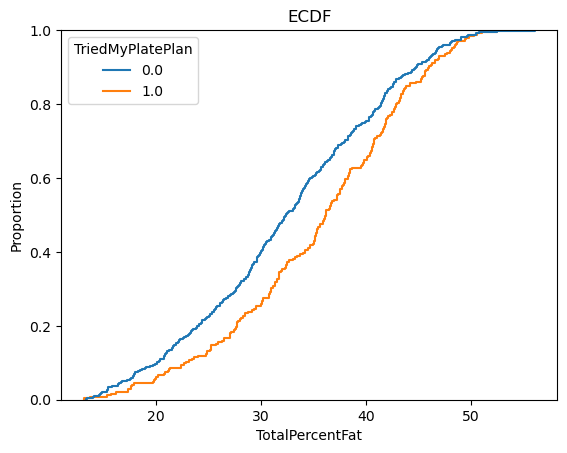

TotalPercentFat                                          \
                           count       mean       std   min    25%   50%   
TriedMyPlatePlan                                                           
0.0                        503.0  32.489861  9.138171  13.3  25.75  32.4   
1.0                        244.0  35.310656  8.643686  13.1  29.50  36.2   

                              
                   75%   max  
TriedMyPlatePlan              
0.0               39.9  56.1  
1.0               41.9  52.5

In [92]:
conditioner = 'TriedMyPlatePlan'
sns.kdeplot( data=nhanes, x='TotalPercentFat', hue=conditioner, common_norm=False ).set(title='KDE')
plt.show()
sns.ecdfplot( data=nhanes, x='TotalPercentFat', hue=conditioner).set(title='ECDF')
plt.show()
nhanes.loc[:,['TotalPercentFat', conditioner]].groupby(conditioner).describe()

It appears that people who have tried myplate seem to have slightly higher fat percentages than people who haven't tried it. The distributions are exteremely similar but this might point to the system not working. Of course, there are other blocking variables that are in play, but its certainly interesting to see.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

First we take the derivative of the loss function with respect to y-hat

$$\dfrac{1}{N} \sum_{i=1}^N 2* \left\lbrace \hat{y}(z)  - y_i \right\rbrace \frac{1}{h}k\left(\frac{z-x_i}{h}\right)$$

Set equal to 0 and remove all constants 

$$\sum_{i=1}^N \left\lbrace \hat{y}(z)  - y_i \right\rbrace \frac{1}{h}k\left(\frac{z-x_i}{h}\right) = 0 $$

Distribute

$$\sum_{i=1}^N \left\lbrace \hat{y}(z)\right\rbrace   \frac{1}{h}k\left(\frac{z-x_i}{h}\right) - \sum_{i=1}^N \left\lbrace y_i \right\rbrace \frac{1}{h}k\left(\frac{z-x_i}{h}\right) = 0$$

Separate the terms

$$\sum_{i=1}^N \left\lbrace \hat{y}(z)\right\rbrace   \frac{1}{h}k\left(\frac{z-x_i}{h}\right) = \sum_{i=1}^N \left\lbrace y_i \right\rbrace \frac{1}{h}k\left(\frac{z-x_i}{h}\right)$$

separate y-hat from the summation as it doesn't change with y

$$ \hat{y}(z) \sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h}\right) = \sum_{i=1}^N \left\lbrace  y_i \right\rbrace \frac{1}{h}k\left(\frac{z-x_i}{h}\right)$$

Solve for y-hat

$$ \hat{y}(z)  = \frac{\sum_{i=1}^N \left\lbrace y_i \right\rbrace \frac{1}{h}k\left(\frac{z-x_i}{h}\right)}{\sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h}\right)}$$

This is the nadaraya watson estimator

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth. expl
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

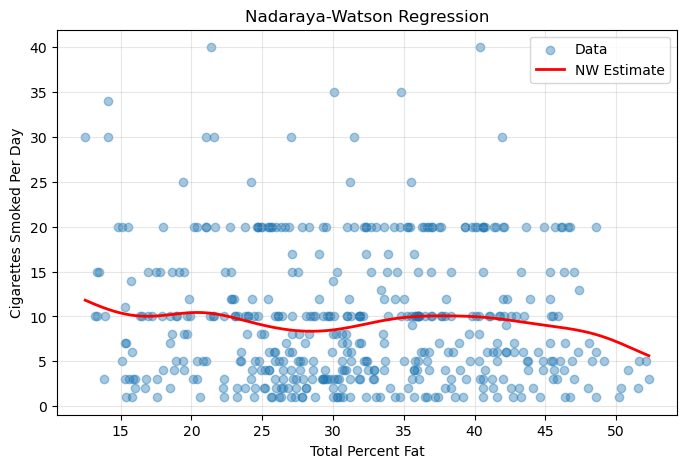

In [138]:
def gaussian_kernel(x):
        return np.exp(-0.5 * x**2) / np.sqrt(2*np.pi)
def silverman_bandwidth(x):
    h = 1.06 * np.std(x) * len(x)**(-1/5)
    if h == 0:
        h = 1e-6  # tiny bandwidth to avoid division by zero
    return h
def gaussian_weights(X,Z,bandwidth):
    X = np.asarray(X).reshape(-1, 1)
    Z = np.asarray(Z).reshape(1, -1)
    X_i = (Z-X) / bandwidth
    W = gaussian_kernel(X_i) / bandwidth
    return W
def nw_estimate(X, Y, Z):
    
    X = np.asarray(X)
    Y = np.asarray(Y)
    h = silverman_bandwidth(X_filter)
    W = gaussian_weights(X_filter,Z,h)
    numerator = np.dot(Y_filter, W)
    denominator = W.sum(axis=0)
    return numerator / denominator
X = pd.to_numeric(nhanes['TotalPercentFat'], errors='coerce').to_numpy()
Y = pd.to_numeric(nhanes['CigarettesSmokedPerDay'], errors='coerce').to_numpy()
filter = ~np.isnan(X) & ~np.isnan(Y)
X_filter = X[filter]    
Y_filter = Y[filter]
Z=np.linspace(X_filter.min(), X_filter.max(), 200)
Y_nw = nw_estimate(X_filter, Y_filter, Z)
plt.figure(figsize=(8,5))
plt.scatter(X_filter, Y_filter, alpha=0.4, label='Data')
plt.plot(Z, Y_nw, color='red', linewidth=2, label='NW Estimate')
plt.xlabel('Total Percent Fat')
plt.ylabel('Cigarettes Smoked Per Day')
plt.title('Nadaraya-Watson Regression')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

I don't seem to see a very strong relationship between the two variables. People have always discussed cigarettes as a weight loss tool, orhow smoking is supposed to decrease your body fat percentage. Although there is a slight negative trend, its hard to say that smoking cigarettes .eads to a dramatic decrease in cigarattes.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome